https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
train_df = pd.read_csv('/Users/ZhangNingning/Udacity/Projects/P2 Titanic/Kaggle Titanic /train.csv')
test_df = pd.read_csv('/Users/ZhangNingning/Udacity/Projects/P2 Titanic/Kaggle Titanic /test.csv')
combine = [train_df, test_df]


Using Kaggle Data to ease the analysis later

In [3]:
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


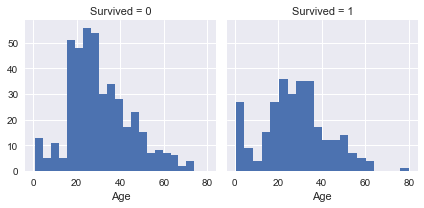

In [5]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)


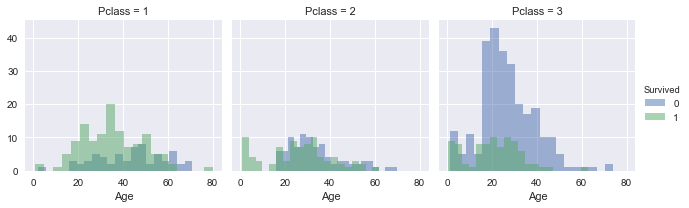

In [6]:
grid1 = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
#grid2 = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect = 1.6)
grid1.map(plt.hist, 'Age', alpha = .5, bins=20)
grid1.add_legend();


Seems that hue is clearer.

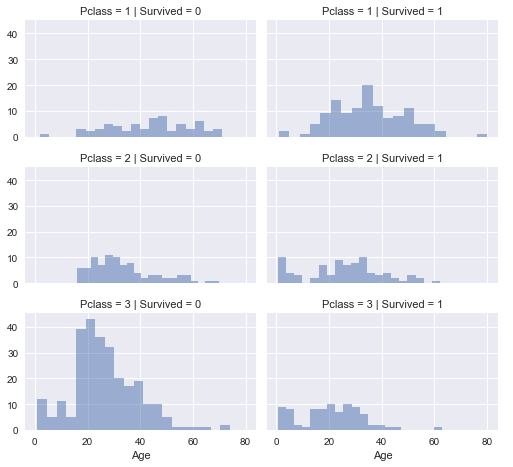

In [7]:
#grid1 = sns.FacetGrid(train_df, col='Pclass', hue='Survived', size = 4)
grid2 = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect = 1.6)
grid2.map(plt.hist, 'Age', alpha = .5, bins=20)
grid2.add_legend();


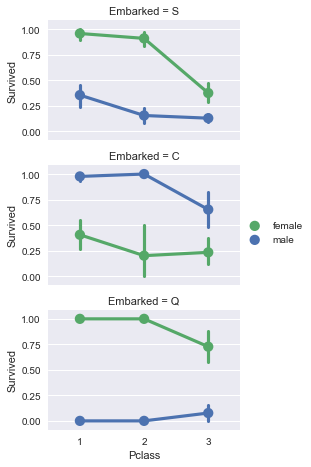

In [8]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid3 = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid3.add_legend()


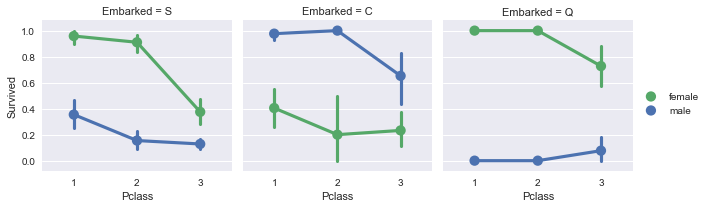

In [9]:
grid4 = sns.FacetGrid(train_df, col='Embarked')
# grid3 = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid4.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid4.add_legend()

the latter one is clearer

In [10]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape



('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [11]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # add an column in dataset as 'Title'
    # ([A-Za-z]+) is at least one letter
    # \. end with a dot. the backslash is to escape the dot as dot has spectial 
    # functionin regular expression
    
pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss


In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826
